# [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/skojaku/applied-soft-comp/blob/master/notebooks/semaxis.ipynb)

# SemAxis

In this hands-on section, we'll implement key concepts of SemAxis using Python and pre-trained GloVe embeddings. We'll take a functional programming approach to keep things clear and straightforward.

### Loading Word Embeddings

First, let's get our embeddings using gensim's built-in downloader:

In [1]:
# Uncomment the following line to install the required packages
# !pip install networkx gensim tqdm nltk bokeh faiss-cpu

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gensim.downloader as api

# Download and load pre-trained GloVe embeddings
model = api.load('glove-wiki-gigaword-100')
print(f"Model contains {len(model.key_to_index)} words")

Model contains 400000 words


### Creating a Semantic Axis

Let's implement the core function for creating a semantic axis from two pole words:

In [3]:
def create_semantic_axis(pos_word, neg_word, model):
    """Create a semantic axis from two pole words"""
    # Get word vectors for both poles
    pos_vector = model[pos_word]
    neg_vector = model[neg_word]

    # Create axis vector by subtracting negative pole from positive pole
    axis_vector = pos_vector - neg_vector

    return axis_vector

# Example: Create a sentiment axis
sentiment_axis = create_semantic_axis('good', 'bad', model)

### Computing Word Scores

Now let's create a function to measure how words align along our semantic axis:

In [4]:
def get_word_score(word, axis_vector, model):
    """Compute how a word aligns with a semantic axis"""
    word_vector = model[word]

    # Compute cosine similarity between word and axis
    score = np.dot(word_vector, axis_vector) / (
        np.linalg.norm(word_vector) * np.linalg.norm(axis_vector)
    )
    return score

# Let's test some words along the sentiment axis
test_words = ['excellent', 'terrible', 'amazing', 'horrible', 'mediocre']
scores = [(word, get_word_score(word, sentiment_axis, model))
          for word in test_words]

# Print results
for word, score in sorted(scores, key=lambda x: x[1]):
    print(f"{word}: {score:.3f}")

horrible: -0.231
terrible: -0.208
mediocre: -0.001
amazing: 0.296
excellent: 0.523


### Visualizing Word Alignments

Let's create a simple visualization of how words align along our semantic axis:

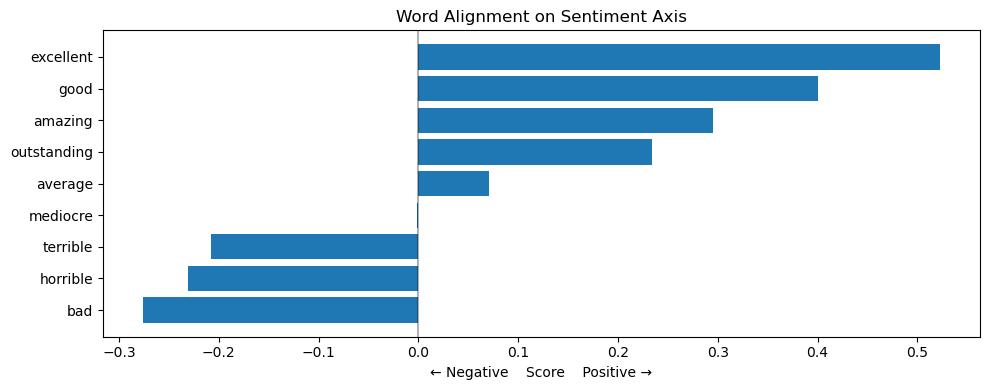

In [5]:
def plot_semantic_alignment(words, axis_vector, model, axis_name="Sentiment"):
    """Plot words along a semantic axis"""
    scores = [(word, get_word_score(word, axis_vector, model))
             for word in words]
    scores = sorted(scores, key=lambda x: x[1])

    words, values = zip(*scores)

    plt.figure(figsize=(10, 4))
    plt.barh(words, values)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.title(f'Word Alignment on {axis_name} Axis')
    plt.xlabel(f'← Negative    Score    Positive →')
    plt.tight_layout()
    plt.show()

# Test with more words
test_words = ['excellent', 'terrible', 'amazing', 'horrible',
              'mediocre', 'outstanding', 'average', 'good', 'bad']
plot_semantic_alignment(test_words, sentiment_axis, model)

### Creating Robust Semantic Axes

Let's implement the expanded pole words approach for more reliable axes:

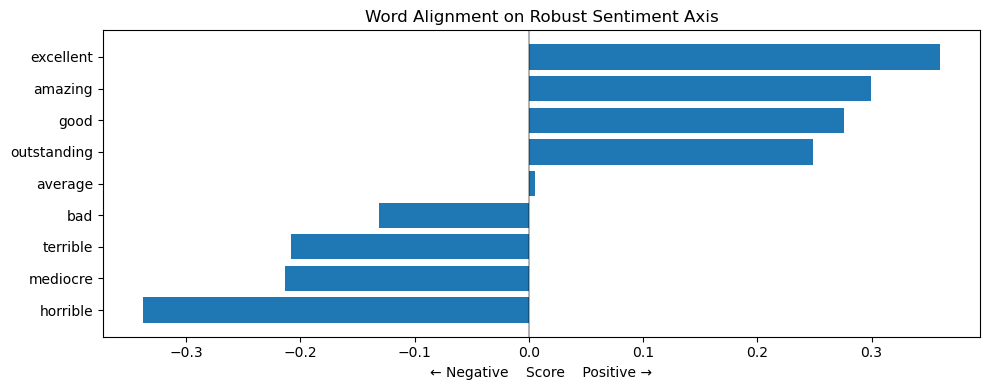

In [6]:
def create_robust_axis(pos_words, neg_words, model, k=5):
    """Create a semantic axis using expanded pole words"""
    # Calculate centroid vectors
    pos_centroid = np.mean([model[w] for w in pos_words], axis=0)
    neg_centroid = np.mean([model[w] for w in neg_words], axis=0)

    # Create axis vector
    return pos_centroid - neg_centroid

# Create a robust sentiment axis and compare results
positive_words = ['great', 'fantastic', 'wonderful']
negative_words = ['horrible', 'awful', 'disappointing']
robust_sentiment_axis = create_robust_axis(positive_words, negative_words, model)
plot_semantic_alignment(test_words, robust_sentiment_axis, model,
                       "Robust Sentiment")

### Analyzing Words Along Multiple Axes

Finally, let's see how words position themselves in a 2D semantic space:

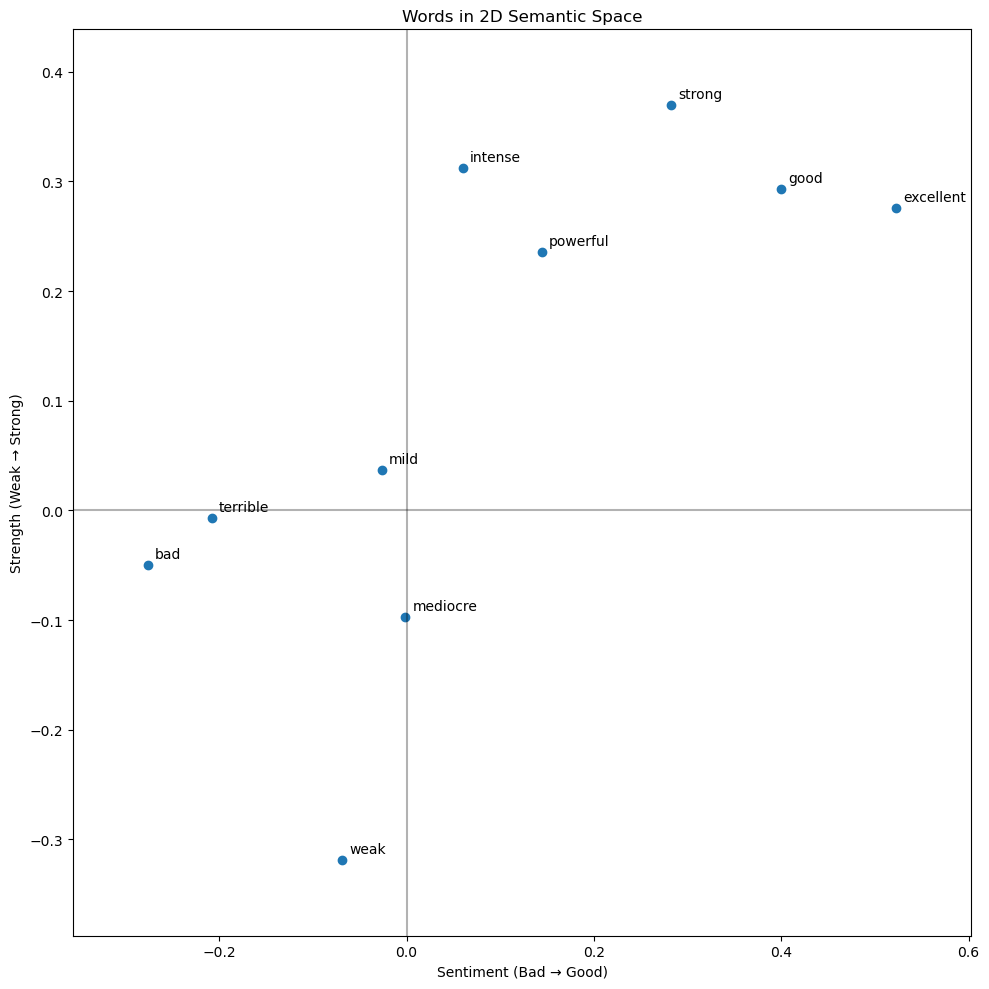

In [7]:
def plot_words_2d(words, axis1, axis2, model,
                  axis1_name="Axis 1", axis2_name="Axis 2"):
    """Plot words in 2D semantic space defined by two axes"""
    # Get scores for both axes
    scores_1 = [get_word_score(word, axis1, model) for word in words]
    scores_2 = [get_word_score(word, axis2, model) for word in words]

    plt.figure(figsize=(10, 10))
    plt.scatter(scores_1, scores_2, marker='o')

    # Add word labels with some padding
    for i, word in enumerate(words):
        plt.annotate(word, (scores_1[i], scores_2[i]),
                    xytext=(5, 5), textcoords='offset points')

    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.xlabel(axis1_name)
    plt.ylabel(axis2_name)
    plt.title('Words in 2D Semantic Space')

    # Add some padding to the plot edges
    plt.margins(0.1)
    plt.tight_layout()
    plt.show()

# Create two different axes
sentiment_axis = create_semantic_axis('good', 'bad', model)
strength_axis = create_semantic_axis('strong', 'weak', model)

# Plot words in 2D semantic space
test_words = ['excellent', 'terrible', 'powerful', 'weak',
              'mediocre', 'strong', 'mild', 'intense', "bad", "good"]
plot_words_2d(test_words, sentiment_axis, strength_axis, model,
              "Sentiment (Bad → Good)", "Strength (Weak → Strong)")

### 🔥 Exercise 🔥

1. Create a 2D semantic space using the following axes:
   - "happy" and "sad" for the emotional axis
   - "fast" and "slow" for the speed axis

2. Visualize these test words in your 2D semantic space:
   ['joyful', 'depressed', 'rapid', 'sluggish', 'energetic', 
    'gloomy', 'quick', 'lazy', 'cheerful', 'miserable']

3. Improve the visualization by using the robust axis approach by providing at least three positive and three negative words for each axis. 

3. Create your own semantic axes using these specific antonym pairs. You can use the robust axis approach.
   1. "expensive" vs "cheap" for a cost axis
   2. "modern" vs "ancient" for a time axis
   
4. Using your cost-time axes from the previous exercise, plot these words:
   ['smartphone', 'computer', 'typewriter', 'tablet', 'scroll',
    'laptop', 'papyrus', 'ebook', 'manuscript', 'book']

5. Answer these analysis questions:
   1. For the cost-time plot, do you see any correlation between how modern
      something is and its cost? Explain your observations.
   2. Are there any words that appear in unexpected positions? Why might this be?

## Exercise 1

1. Create a 2D semantic space using the following axes:
   - "happy" and "sad" for the emotional axis
   - "fast" and "slow" for the speed axis

In [8]:
happy_sad_axis = create_semantic_axis('happy', 'sad', model)
fast_slow_axis = create_semantic_axis('fast', 'slow', model)


2. Visualize these test words in your 2D semantic space:
   ['joyful', 'depressed', 'rapid', 'sluggish', 'energetic',
    'gloomy', 'quick', 'lazy', 'cheerful', 'miserable']

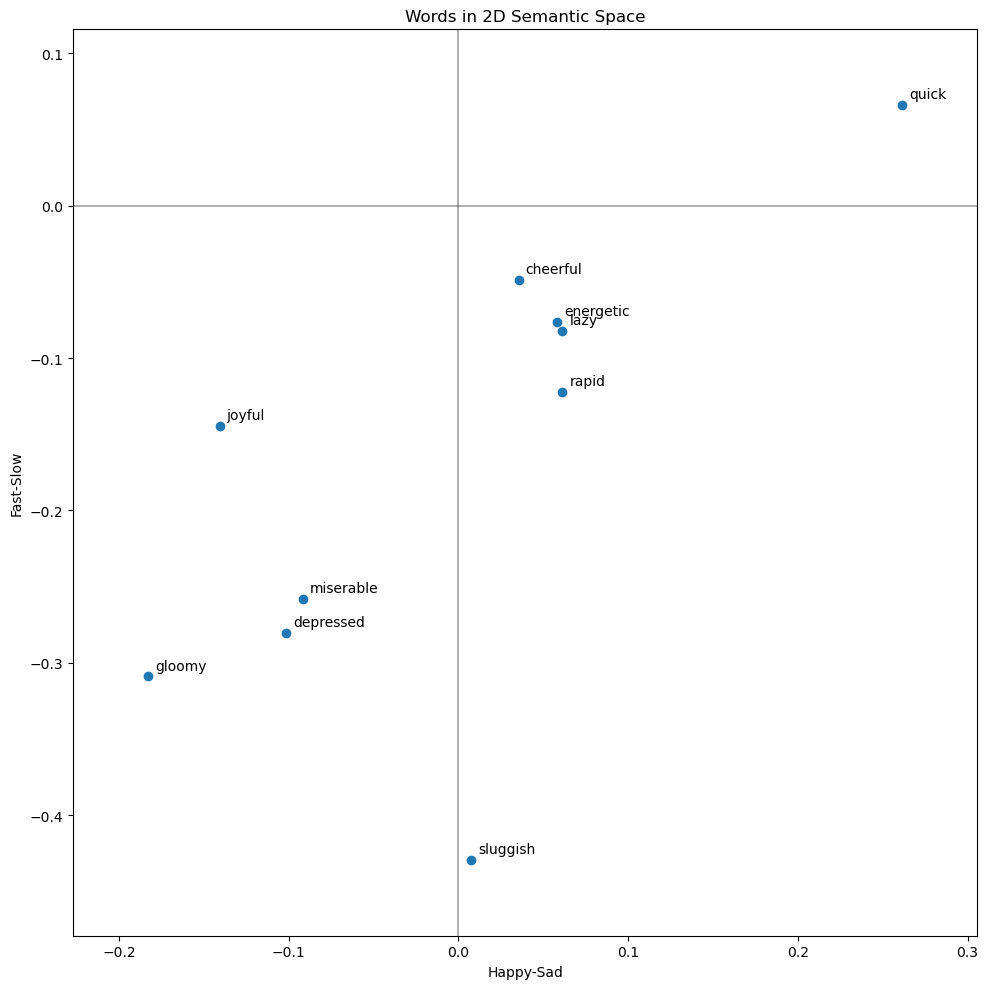

In [9]:
plot_words_2d(['joyful', 'depressed', 'rapid', 'sluggish', 'energetic',
                'gloomy', 'quick', 'lazy', 'cheerful', 'miserable'],
                happy_sad_axis, fast_slow_axis, model,
                "Happy-Sad", "Fast-Slow")



3. Create your own semantic axes using these specific antonym pairs. You can use the robust axis approach.
   1. "expensive" vs "cheap" for a cost axis
   2. "modern" vs "ancient" for a time axis

In [11]:
expensive_cheap_axis = create_robust_axis(['expensive', 'pricey', 'costly'],
                                           ['cheap', 'inexpensive', 'budget'], model)
modern_ancient_axis = create_robust_axis(['modern', 'contemporary', 'up-to-date'],
                                           ['ancient', 'old-fashioned', 'antique'], model)

4. Using your cost-time axes from the previous exercise, plot these words:
   ['smartphone', 'computer', 'typewriter', 'tablet', 'scroll',
    'laptop', 'papyrus', 'ebook', 'manuscript', 'book']

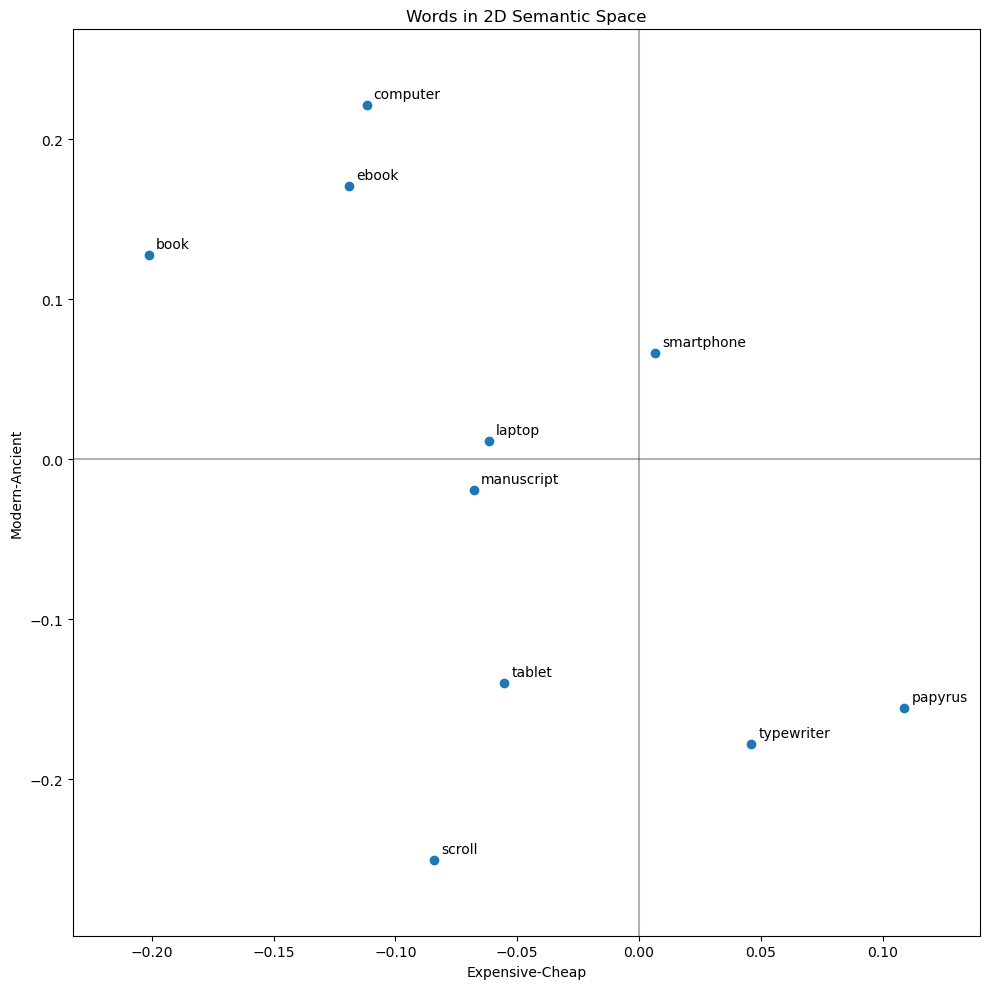

In [12]:
plot_words_2d(['smartphone', 'computer', 'typewriter', 'tablet', 'scroll',
                'laptop', 'papyrus', 'ebook', 'manuscript', 'book'],
                expensive_cheap_axis, modern_ancient_axis, model,
                "Expensive-Cheap", "Modern-Ancient")

5. Answer these analysis questions:
   1. For the cost-time plot, do you see any correlation between how modern
      something is and its cost? Explain your observations.
   2. Are there any words that appear in unexpected positions? Why might this be?